In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import ConvLSTM2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt 
import datetime
from math import sqrt

In [2]:
dt = pd.read_csv('Load_data_new.csv',  low_memory=False,
infer_datetime_format=True, parse_dates=['Time'], index_col=['Time'])
dt=dt.fillna(method='pad')
dt.isnull().sum()

air_pressure[mmHg]                 0
air_temperature[degree celcius]    0
relative_humidity[%]               0
wind_speed[M/S]                    0
solar_irridiation[W/m²]            0
total_cloud_cover[from ten]        0
electricity_demand_values[kw]      0
heat_demand_values[kw]             0
dtype: int64

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70080 entries, 2010-12-01 00:00:00 to 2018-11-28 23:00:00
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   air_pressure[mmHg]               70080 non-null  float64
 1   air_temperature[degree celcius]  70080 non-null  float64
 2   relative_humidity[%]             70080 non-null  float64
 3   wind_speed[M/S]                  70080 non-null  float64
 4   solar_irridiation[W/m²]          70080 non-null  int64  
 5   total_cloud_cover[from ten]      70080 non-null  object 
 6   electricity_demand_values[kw]    70080 non-null  float64
 7   heat_demand_values[kw]           70080 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.8+ MB


In [4]:
dt.describe()

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw]
count,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000
mean,734.587449,17.874435,60.633647,4.813271,257.293094,393.894392,263.551003
std,5.009065,10.681696,21.996270,2.597184,258.725788,239.177728,314.720551
min,716.500000,-14.400000,4.000000,0.000000,0.000000,112.947618,0.000000
25%,731.400000,10.000000,43.000000,3.000000,0.000000,227.708651,0.000000
50%,734.200000,18.900000,61.000000,5.000000,299.500000,323.095501,137.430266
75%,737.500000,25.600000,79.000000,6.000000,499.000000,476.911512,448.333458
max,757.500000,43.300000,100.000000,26.000000,699.000000,1592.893206,1529.168786


In [5]:
dtDummies=pd.get_dummies(dt, columns=['total_cloud_cover[from ten]'])

In [6]:
dtDummies.describe()

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],total_cloud_cover[from ten]_10/10.,total_cloud_cover[from ten]_2/10–3/10.,total_cloud_cover[from ten]_4/10.,total_cloud_cover[from ten]_5/10.,total_cloud_cover[from ten]_7/10 – 8/10.,total_cloud_cover[from ten]_Sky obscured by fog and/or other meteorological phenomena.,total_cloud_cover[from ten]_no clouds
count,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000
mean,734.587449,17.874435,60.633647,4.813271,257.293094,393.894392,263.551003,0.152583,0.116510,0.001327,0.086387,0.131535,0.004523,0.507135
std,5.009065,10.681696,21.996270,2.597184,258.725788,239.177728,314.720551,0.359587,0.320837,0.036405,0.280937,0.337987,0.067104,0.499953
min,716.500000,-14.400000,4.000000,0.000000,0.000000,112.947618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.400000,10.000000,43.000000,3.000000,0.000000,227.708651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,734.200000,18.900000,61.000000,5.000000,299.500000,323.095501,137.430266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,737.500000,25.600000,79.000000,6.000000,499.000000,476.911512,448.333458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,757.500000,43.300000,100.000000,26.000000,699.000000,1592.893206,1529.168786,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#in this way we use the object column and the data column numbers expends
dt_daily=dtDummies.resample('D').sum()
dt_daily.head()

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],total_cloud_cover[from ten]_10/10.,total_cloud_cover[from ten]_2/10–3/10.,total_cloud_cover[from ten]_4/10.,total_cloud_cover[from ten]_5/10.,total_cloud_cover[from ten]_7/10 – 8/10.,total_cloud_cover[from ten]_Sky obscured by fog and/or other meteorological phenomena.,total_cloud_cover[from ten]_no clouds
Time,,,,,,,,,,,,,,
2010-12-01,17569.0,666.7,1840.0,92.0,6404,8549.852211,6881.646223,2,3,0,2,2,1,14
2010-12-02,17510.0,684.1,1722.0,159.0,6526,7910.870398,4721.360230,0,5,0,3,1,0,15
2010-12-03,17584.5,617.1,1716.0,113.0,5743,8758.895028,8530.596629,1,1,0,2,3,0,17
2010-12-04,17618.1,647.8,1398.0,154.0,6523,10013.066990,14129.057624,2,6,0,4,2,0,10
2010-12-05,17686.0,600.1,1066.0,137.0,6258,10694.276861,17116.650725,1,0,0,1,0,0,22


In [8]:
# #in this way we lose the object column 
# dt_daily=dt.resample('D').sum()
# dt_daily.head()

In [9]:
multi_length=len(dt_daily.columns)

In [10]:
train_daily, test_daily = np.array(dt_daily[:2338].values), np.array(dt_daily[2338:-1].values) # 1 record is avoided for division with 7

In [11]:
train_daily[0][6]

6881.64622346925

In [12]:
dt_daily.head(1)

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],total_cloud_cover[from ten]_10/10.,total_cloud_cover[from ten]_2/10–3/10.,total_cloud_cover[from ten]_4/10.,total_cloud_cover[from ten]_5/10.,total_cloud_cover[from ten]_7/10 – 8/10.,total_cloud_cover[from ten]_Sky obscured by fog and/or other meteorological phenomena.,total_cloud_cover[from ten]_no clouds
Time,,,,,,,,,,,,,,
2010-12-01,17569.0,666.7,1840.0,92.0,6404,8549.852211,6881.646223,2,3,0,2,2,1,14


In [13]:
train_daily_week=np.array(np.split(train_daily,len(train_daily)/7))
test_daily_week=np.array(np.split(test_daily,len(test_daily)/7))

In [14]:
dt_daily.head(1)

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],total_cloud_cover[from ten]_10/10.,total_cloud_cover[from ten]_2/10–3/10.,total_cloud_cover[from ten]_4/10.,total_cloud_cover[from ten]_5/10.,total_cloud_cover[from ten]_7/10 – 8/10.,total_cloud_cover[from ten]_Sky obscured by fog and/or other meteorological phenomena.,total_cloud_cover[from ten]_no clouds
Time,,,,,,,,,,,,,,
2010-12-01,17569.0,666.7,1840.0,92.0,6404,8549.852211,6881.646223,2,3,0,2,2,1,14


In [15]:
train_daily_week[0,0,:]

array([1.75690000e+04, 6.66700000e+02, 1.84000000e+03, 9.20000000e+01,
       6.40400000e+03, 8.54985221e+03, 6.88164622e+03, 2.00000000e+00,
       3.00000000e+00, 0.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 1.40000000e+01])

## Naive forecasting

In [16]:
# #dropping 29 of fabruary data # this version is not necessary 
# dt_daily_eq=dt_daily.drop(dt_daily[dt_daily.index=="2012-02-29"].index)
# dt_daily_eq=dt_daily_eq.drop(dt_daily_eq[dt_daily_eq.index=="2016-02-29"].index)

In [17]:
#len(dt_daily_eq)

In [18]:
# #without 29 feb version
# train_daily_NF, test_daily_NF = np.array(dt_daily_eq[:2338].values), np.array(dt_daily_eq[2338:-6].values) # 6 records are avoided for division with 7

In [19]:
dt_daily_eq=dt_daily.copy()

In [20]:
#with february 29 version
train_daily_NF, test_daily_NF = np.array(dt_daily_eq[:2338].values), np.array(dt_daily_eq[2338:-1].values) # 1 record is avoided for division with 7

In [21]:
train_daily_week_NF=np.array(np.split(train_daily_NF,len(train_daily_NF)/7))
test_daily_week_NF=np.array(np.split(test_daily_NF,len(test_daily_NF)/7))

### Methods for naive forecasting

In [22]:
def predictions_day_weekly(train,test):
    k=np.array(list(train)+list(test))
    pred=[]
    for i in range(len(test)):
        pred.append(np.repeat(k[-1-len(test)+i][-1][6],7))
    return np.array(pred)

In [23]:
def predictions_weekly(train,test):
    k=np.array(list(train)+list(test))
    pred=[]
    for i in range(len(test)):
        pred.append(np.array(k[:len(train)+i])[-1].T[6])
    return np.array(pred)

In [24]:
def predictions_year_weekly(train,test):
    k=np.array(list(train)+list(test))
    pred=[]
    for i in range(len(test)):
        pred.append(np.repeat(k[-52-len(test)+i][-1][6],7))
    return np.array(pred)

In [25]:
def evaluation_NF(test,pred):
    totalMSE=mean_squared_error(np.array(test)[:,:,6].flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test.T[6][i]),np.array(pred).T[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [26]:
# train_daily_week_NF
# test_daily_week_NF

In [27]:
train_daily.T[6][:10]

array([ 6881.64622347,  4721.36022955,  8530.59662902, 14129.05762394,
       17116.6507251 , 10709.73649737, 12392.91117699, 10372.16205967,
        8324.01731053,  6491.09611501])

In [28]:
np.array(train_daily_week_NF)[1].T[6]

array([10372.16205967,  8324.01731053,  6491.09611501, 11260.43120088,
       10605.77521662, 13966.80704023, 15523.64826681])

In [29]:
predictions_day_weekly_results=evaluation_NF(test_daily_week_NF,predictions_day_weekly(train_daily_week_NF,test_daily_week_NF))
predictions_day_weekly_results

(15680746.229452267,
 [7805856.096757912,
  16426202.35869326,
  13120401.703324838,
  15088896.638302332,
  15645837.080686335,
  19781138.114301857,
  21896891.61409934],
 3959.8921992211185,
 [2793.896221544013,
  4052.9251607565197,
  3622.2095057195183,
  3884.4428993489314,
  3955.481902459716,
  4447.599140469143,
  4679.411460226525])

In [30]:
predictions_weekly_results=evaluation_NF(test_daily_week_NF,predictions_weekly(train_daily_week_NF,test_daily_week_NF))
predictions_weekly_results

(20409552.0275731,
 [27582264.718501937,
  23867644.765686315,
  16311471.065092856,
  16717743.258239422,
  15474976.193909328,
  21015872.57748251,
  21896891.61409934],
 4517.693219727641,
 [5251.88201681092,
  4885.452360394717,
  4038.746224398465,
  4088.733698621056,
  3933.824626735326,
  4584.307208017643,
  4679.411460226525])

In [31]:
predictions_year_weekly_results=evaluation_NF(test_daily_week_NF,predictions_year_weekly(train_daily_week_NF,test_daily_week_NF))
predictions_year_weekly_results

(16650691.854655977,
 [28301068.32185427,
  26186159.99667583,
  15872839.140311088,
  13820098.27971361,
  12368243.217626853,
  11623034.912694206,
  8383399.113715983],
 4080.5259286832106,
 [5319.874840807279,
  5117.241444047352,
  3984.073184607819,
  3717.5392774944034,
  3516.8513215128746,
  3409.257237683042,
  2895.4100078772926])

In [32]:
dt_daily.iloc[[2338]].index.day_name()

Index(['Wednesday'], dtype='object', name='Time')

In [33]:
test_days_names=np.array(dt_daily.iloc[2338:2345].index.day_name())

<ipython-input-34-2ae1038aedf9>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  axs[3].bar(label_results,np.array(results)[:,2])


[Text(0.5, 1.0, 'root mean square error by each method')]

<Figure size 432x288 with 0 Axes>

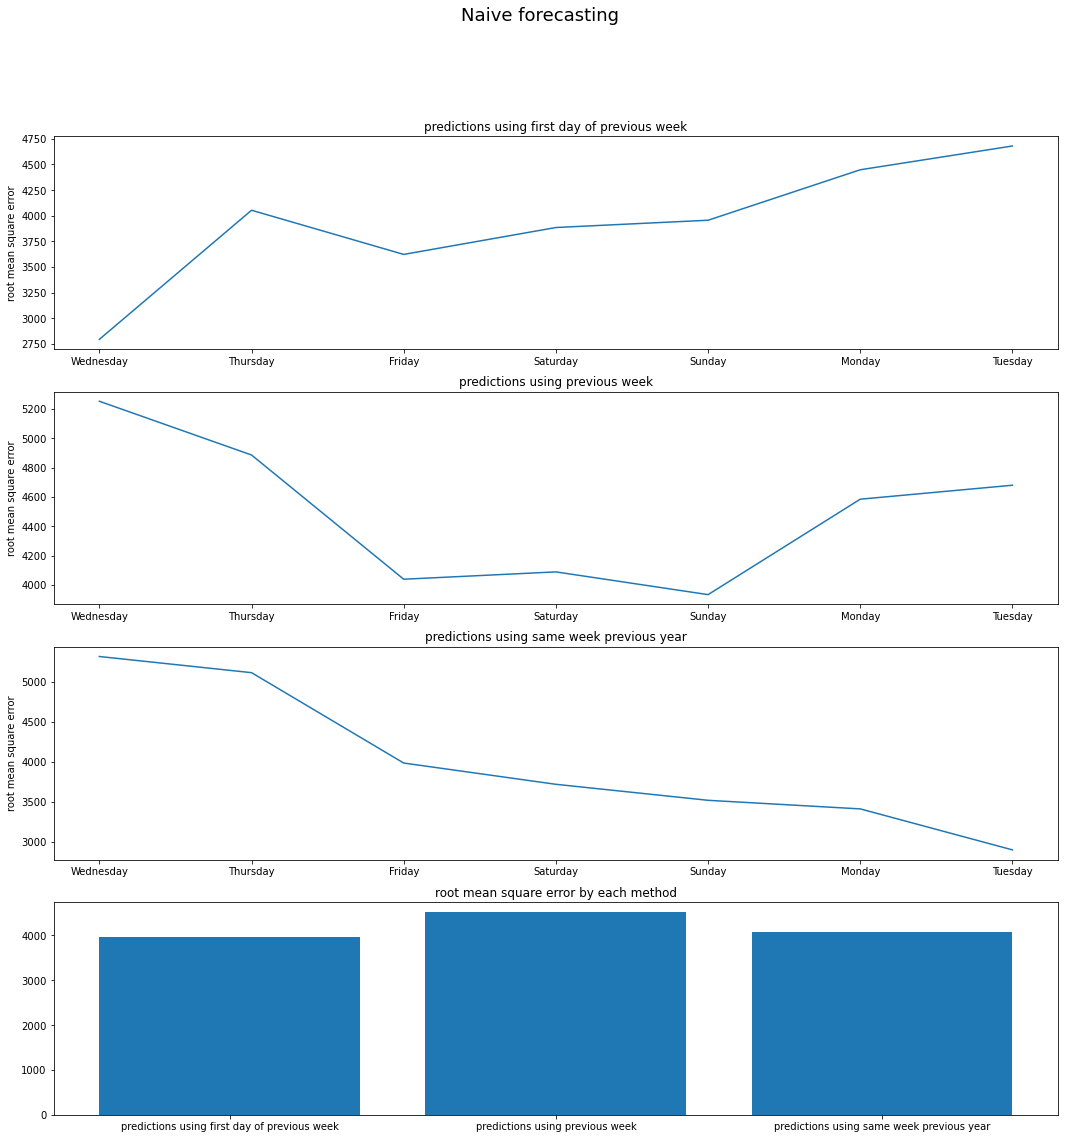

In [34]:
fig = plt.figure()
a=[]
fig, axs = plt.subplots(4,1,figsize=(18,18))
fig.suptitle('Naive forecasting',fontsize=18)
results=[predictions_day_weekly_results,predictions_weekly_results,predictions_year_weekly_results]
label_results=["predictions using first day of previous week",
               "predictions using previous week","predictions using same week previous year"]
for i in range(3):
    axs[i].plot(test_days_names, results[i][3])
    axs[i].set(title=label_results[i], ylabel="root mean square error")
axs[3].bar(label_results,np.array(results)[:,2])
axs[3].set(title="root mean square error by each method")

## ARIMA

In [35]:
def evaluation_arima(test,pred):
    totalMSE=mean_squared_error(np.array(test).T[6].T.flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test.T[6][i]),np.array(pred).T[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [36]:
def predictions_arima(train,test):
    k=np.array(list(train.T[6].T)+list(test.T[6].T))
    predictions=[]
    for i in range(len(test)):
        predictions.append(ARIMA(k[:len(train)+i,6], order=(4,0,0)).fit(disp=False).predict(len(k[:len(train)+i,6]), len(k[:len(train)+i,6])+6))
    return np.array(predictions)

In [37]:
train_daily[:10,6]

array([ 6881.64622347,  4721.36022955,  8530.59662902, 14129.05762394,
       17116.6507251 , 10709.73649737, 12392.91117699, 10372.16205967,
        8324.01731053,  6491.09611501])

C:\Users\ktenev\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\ktenev\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


[Text(0.5, 1.0, 'Partial autocorrelation function lags=80')]

<Figure size 432x288 with 0 Axes>

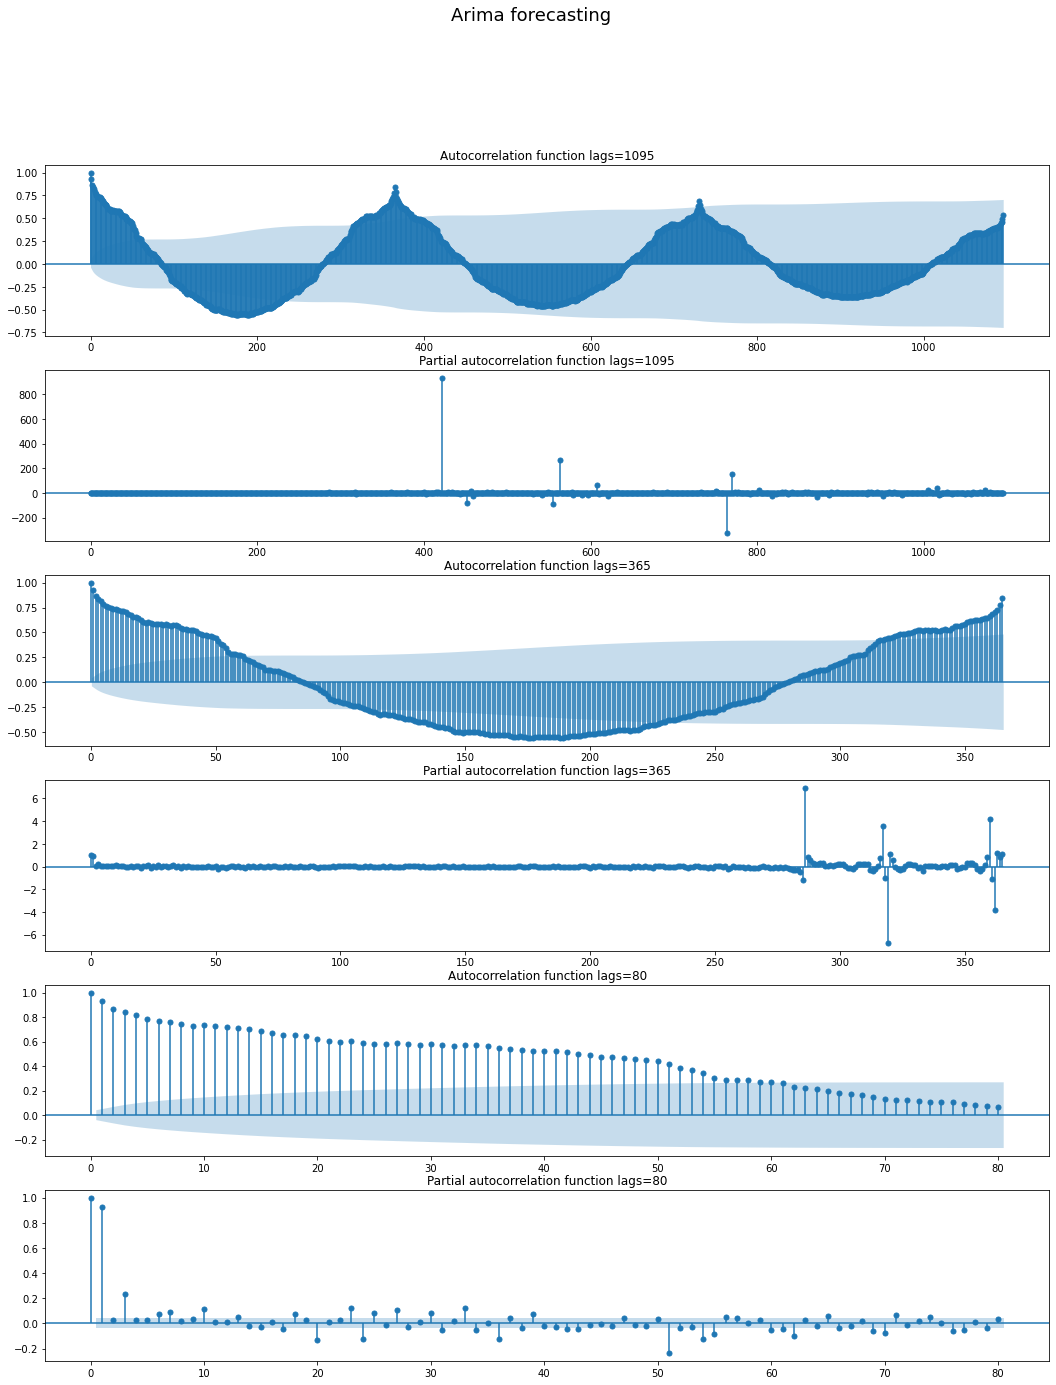

In [148]:
fig = plt.figure()
fig, axs = plt.subplots(6,1,figsize=(18,22))
fig.suptitle('Arima forecasting',fontsize=18)
plot_acf(train_daily[:,6], ax=axs[0], lags=1095)
axs[0].set(title="Autocorrelation function lags=1095")
plot_pacf(train_daily[:,6], ax=axs[1], lags=1095)
axs[1].set(title="Partial autocorrelation function lags=1095")
plot_acf(train_daily[:,6], ax=axs[2], lags=365)
axs[2].set(title="Autocorrelation function lags=365")
plot_pacf(train_daily[:,6], ax=axs[3], lags=365)
axs[3].set(title="Partial autocorrelation function lags=365")
plot_acf(train_daily[:,6], ax=axs[4], lags=80)
axs[4].set(title="Autocorrelation function lags=80")
plot_pacf(train_daily[:,6], ax=axs[5], lags=80)
axs[5].set(title="Partial autocorrelation function lags=80")

In [39]:
# #with dummies data arima is arima(4,0,0), arima(2,0,0) gives similar but worse results 

In [40]:
predd=predictions_arima(train_daily_week,test_daily_week)

C:\Users\ktenev\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [41]:
results_arima=evaluation_arima(test_daily_week,predd)
results_arima

(16654138.041285207,
 [9533198.63843792,
  14828992.204298686,
  15701278.99943078,
  14984875.244305924,
  15875006.500961574,
  20572916.170207124,
  25082698.531354457],
 4080.9481791962526,
 [3087.5878349348895,
  3850.843051112144,
  3962.483943113307,
  3871.030256185803,
  3984.345178440439,
  4535.737665496884,
  5008.263025376608])

Text(0.5, 1.0, 'Arima predictions for days of week')

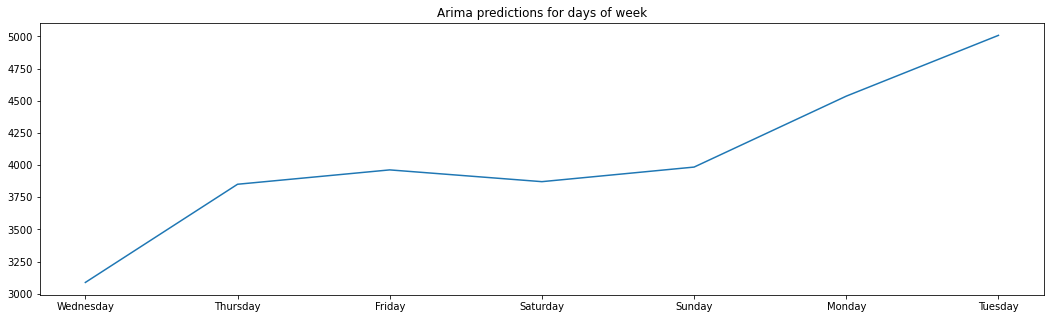

In [42]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_arima[3])
plt.title("Arima predictions for days of week")

## CNN

### Univariate CNN

In [43]:
def evaluation_univCNN(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i][0]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [44]:
train_daily.T[6]

array([6881.64622347, 4721.36022955, 8530.59662902, ..., 3014.29582913,
       4252.12102385, 3428.88705652])

In [45]:
#train_daily_univCNN_X
train_daily_univCNN_X=[]
train_daily_univCNN_y=[]
days=14
[[train_daily_univCNN_X.append([[y] for y in train_daily.T[6][x:x+days]]),train_daily_univCNN_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_univCNN_X=np.array(train_daily_univCNN_X)
train_daily_univCNN_y=np.array(train_daily_univCNN_y)

In [46]:
test_daily_univCNN_X=[]
test_daily_univCNN_y=[]
#days=14
[[test_daily_univCNN_X.append([[y] for y in test_daily.T[6][x:x+days]]),test_daily_univCNN_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_univCNN_X=np.array(test_daily_univCNN_X)
test_daily_univCNN_y=np.array(test_daily_univCNN_y)

In [47]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(days,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 32)                6176      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 7)                 119       
                                                        

In [48]:
model.fit(train_daily_univCNN_X, train_daily_univCNN_y,validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
66/66 [==============================] - 1s 8ms/step - loss: 44759084.0000 - val_loss: 28604398.0000
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 16110897.0000 - val_loss: 23870078.0000
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 14941199.0000 - val_loss: 22999518.0000
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 14053998.0000 - val_loss: 21701632.0000
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 13565208.0000 - val_loss: 20907354.0000
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 12993884.0000 - val_loss: 20192252.0000
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 12942780.0000 - val_loss: 21032954.0000
Epoch 8/100
66/66 [==============================] - 0s 2ms/step - loss: 12359030.0000 - val_loss: 19363046.0000
Epoch 9/100
66/66 [==============================] - 0s 2ms/step - loss: 12515303.0000 - val_los

Epoch 74/100
66/66 [==============================] - 0s 2ms/step - loss: 4069445.7500 - val_loss: 7025601.5000
Epoch 75/100
66/66 [==============================] - 0s 2ms/step - loss: 3988371.5000 - val_loss: 6857919.0000
Epoch 76/100
66/66 [==============================] - 0s 2ms/step - loss: 4016240.2500 - val_loss: 7105159.5000
Epoch 77/100
66/66 [==============================] - 0s 2ms/step - loss: 3963120.7500 - val_loss: 7343271.0000
Epoch 78/100
66/66 [==============================] - 0s 2ms/step - loss: 4178244.7500 - val_loss: 7011695.0000
Epoch 79/100
66/66 [==============================] - 0s 2ms/step - loss: 3994274.2500 - val_loss: 7859732.0000
Epoch 80/100
66/66 [==============================] - 0s 2ms/step - loss: 3918719.0000 - val_loss: 7081098.0000
Epoch 81/100
66/66 [==============================] - 0s 2ms/step - loss: 3948142.2500 - val_loss: 6736916.5000
Epoch 82/100
66/66 [==============================] - 0s 2ms/step - loss: 3801857.0000 - val_loss: 71539

In [49]:
train_daily_univCNN_X.T[0].T

array([[ 6881.64622347,  4721.36022955,  8530.59662902, ...,
        10605.77521662, 13966.80704023, 15523.64826681],
       [ 4721.36022955,  8530.59662902, 14129.05762394, ...,
        13966.80704023, 15523.64826681, 10519.0946618 ],
       [ 8530.59662902, 14129.05762394, 17116.6507251 , ...,
        15523.64826681, 10519.0946618 , 12410.1886543 ],
       ...,
       [ 4232.12490945,  3665.48928018,  3841.58370371, ...,
         1104.05323247,     0.        ,     0.        ],
       [ 3665.48928018,  3841.58370371,  1776.07663729, ...,
            0.        ,     0.        ,     0.        ],
       [ 3841.58370371,  1776.07663729,   588.84604037, ...,
            0.        ,     0.        ,     0.        ]])

In [50]:
k=np.array(list(train_daily_univCNN_X.T[0].T)+list(test_daily_univCNN_X.T[0].T))
predictions=[model.predict(k[len(train_daily_univCNN_X)-1+x:len(train_daily_univCNN_X)+x]) for x in range(len(test_daily_univCNN_X))]

In [51]:
np.array(predictions)[0][0]

array([ 240.16228, 1008.6516 ,  653.6239 , 1326.8937 ,  246.20181,
       3118.1003 , 3975.2712 ], dtype=float32)

In [52]:
results_univCNN=evaluation_univCNN(test_daily_univCNN_y,np.array(predictions))
results_univCNN

(6191002.141763428,
 [2710221.0299729668,
  323102.1993068998,
  1128721.8444810384,
  1069979.756903421,
  609196.5394134235,
  490629.19397587,
  313989.988347893],
 2488.172450165669,
 [1646.274895019956,
  568.4207942245778,
  1062.413217388149,
  1034.398258362523,
  780.5104351726654,
  700.4492800880518,
  560.3480956940007])

Text(0.5, 1.0, 'Univariate CNN')

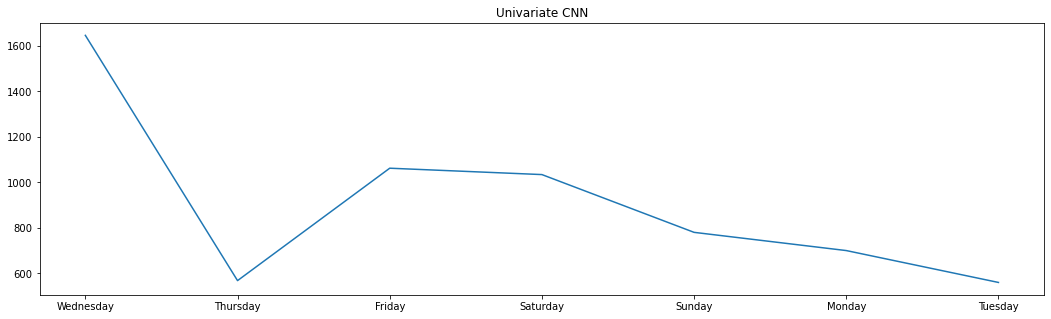

In [53]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_univCNN[3])
plt.title("Univariate CNN")

### Multi-channel CNN

In [54]:
def evaluation_multChanCNN(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [55]:
train_daily_multChanCNN_X=[]
train_daily_multChanCNN_y=[]
days=14
[[train_daily_multChanCNN_X.append([y for y in train_daily[x:x+days]]),train_daily_multChanCNN_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_multChanCNN_X=np.array(train_daily_multChanCNN_X)
train_daily_multChanCNN_y=np.array(train_daily_multChanCNN_y)

In [56]:
train_daily_multChanCNN_X.shape

(2317, 14, 14)

In [57]:
len(train_daily)

2338

In [58]:
test_daily_multChanCNN_X=[]
test_daily_multChanCNN_y=[]
#days=7
[[test_daily_multChanCNN_X.append([y for y in test_daily[x:x+days]]),test_daily_multChanCNN_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_multChanCNN_X=np.array(test_daily_multChanCNN_X)
test_daily_multChanCNN_y=np.array(test_daily_multChanCNN_y)

In [59]:
del model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(14,multi_length)))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 12, 32)            1376      
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 32)            2080      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 32)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               20608     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                      

In [60]:
train_daily_multChanCNN_X.shape

(2317, 14, 14)

In [61]:
model.fit(train_daily_multChanCNN_X, train_daily_multChanCNN_y,validation_split=0.1,epochs=30,batch_size=32)

Epoch 1/30
66/66 [==============================] - 2s 7ms/step - loss: 39390788.0000 - val_loss: 26866284.0000
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 16545502.0000 - val_loss: 26269268.0000
Epoch 3/30
66/66 [==============================] - 0s 4ms/step - loss: 15318401.0000 - val_loss: 23842450.0000
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 14649588.0000 - val_loss: 22410100.0000
Epoch 5/30
66/66 [==============================] - 0s 4ms/step - loss: 13877598.0000 - val_loss: 23050068.0000
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 13485929.0000 - val_loss: 20618502.0000
Epoch 7/30
66/66 [==============================] - 0s 4ms/step - loss: 12898822.0000 - val_loss: 19396652.0000
Epoch 8/30
66/66 [==============================] - 0s 3ms/step - loss: 12516407.0000 - val_loss: 18609116.0000
Epoch 9/30
66/66 [==============================] - 0s 4ms/step - loss: 11658348.0000 - val_loss: 182666

In [62]:
len(train_daily_multChanCNN_X)

2317

In [63]:
#model.predict(k[len(train_daily_multChanCNN_X)-1+2:len(train_daily_multChanCNN_X)+2])[0]

In [64]:
k=np.array(list(train_daily_multChanCNN_X)+list(test_daily_multChanCNN_X))
[model.predict(k[len(train_daily_multChanCNN_X)-1+x:len(train_daily_multChanCNN_X)+x])[0] for x in range(1)]

[array([1217.4263,  980.637 , 1048.3802, 1660.3269, 2333.8245, 1769.2573,
        2045.0089], dtype=float32)]

In [65]:
k=np.array(list(train_daily_multChanCNN_X)+list(test_daily_multChanCNN_X))
predictions_multChanCNN=[model.predict(k[len(train_daily_multChanCNN_X)-1+x:len(train_daily_multChanCNN_X)+x])[0] for x in range(len(test_daily_multChanCNN_X))]

In [66]:
test_daily_multChanCNN_y

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,   358.74041579,  1115.04991074],
       [    0.        ,     0.        ,    56.57150289, ...,
          358.74041579,  1115.04991074,   718.41291573],
       [    0.        ,    56.57150289,     0.        , ...,
         1115.04991074,   718.41291573,   150.62312119],
       ...,
       [20214.29069712, 27736.13669677, 25450.99002325, ...,
        29171.62983311, 24335.92496762, 18728.07437953],
       [27736.13669677, 25450.99002325, 23022.1411349 , ...,
        24335.92496762, 18728.07437953, 22783.30114282],
       [25450.99002325, 23022.1411349 , 29171.62983311, ...,
        18728.07437953, 22783.30114282, 20844.76677004]])

In [67]:
np.array(predictions_multChanCNN)

array([[ 1217.4263  ,   980.637   ,  1048.3802  , ...,  2333.8245  ,
         1769.2573  ,  2045.0089  ],
       [   52.817966,  -343.50784 ,  -361.57593 , ...,   299.6259  ,
          337.56366 ,   916.29456 ],
       [ -113.979935,  -396.946   ,   -64.085175, ...,   603.73584 ,
          634.1437  ,   961.1529  ],
       ...,
       [24256.229   , 24491.652   , 23224.656   , ..., 23026.818   ,
        22206.799   , 22144.389   ],
       [24048.656   , 24816.488   , 22553.3     , ..., 22632.37    ,
        20467.262   , 20719.727   ],
       [24977.234   , 25467.814   , 22621.152   , ..., 22943.627   ,
        20514.473   , 21418.916   ]], dtype=float32)

In [68]:
results_multChanCNN=evaluation_multChanCNN(test_daily_multChanCNN_y,predictions_multChanCNN)
results_multChanCNN

(5667795.510395866,
 [2059432.3633513735,
  148956.05054246154,
  166271.8945786047,
  229490.27402616452,
  256098.58426986868,
  140563.4039625103,
  202406.02067242705],
 2380.7132356493225,
 [1435.0722502199578,
  385.94824852881703,
  407.76450872851194,
  479.05143150413875,
  506.06183838525965,
  374.9178629546881,
  449.8955664067241])

Text(0.5, 1.0, 'Multi-channel CNN')

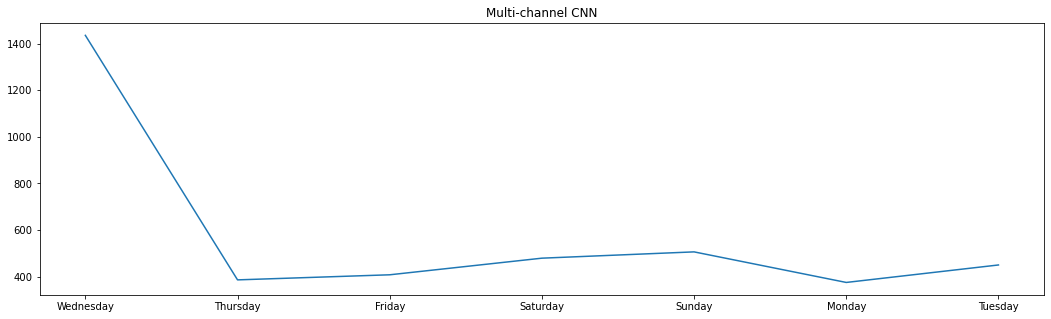

In [69]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_multChanCNN[3])
plt.title("Multi-channel CNN")

### Multi-headed CNN

In [70]:
def evaluation_multHeadedCNN(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [71]:
train_daily_multHeadedCNN_X=[]
train_daily_multHeadedCNN_y=[]
days=14
[[train_daily_multHeadedCNN_X.append([y for y in train_daily[x:x+days]]),train_daily_multHeadedCNN_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_multHeadedCNN_X=np.array(train_daily_multHeadedCNN_X)
train_daily_multHeadedCNN_y=np.array(train_daily_multHeadedCNN_y)

In [72]:
test_daily_multHeadedCNN_X=[]
test_daily_multHeadedCNN_y=[]
#days=14
[[test_daily_multHeadedCNN_X.append([y for y in test_daily[x:x+days]]),test_daily_multHeadedCNN_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_multHeadedCNN_X=np.array(test_daily_multHeadedCNN_X)
test_daily_multHeadedCNN_y=np.array(test_daily_multHeadedCNN_y)

In [73]:
train_daily_multHeadedCNN_y.shape

(2317, 7)

In [74]:
input_layers=[] 
outputs_layers=[]
for _ in range(multi_length):
    layer_0=Input(shape=(days,1))
    layer_1=Conv1D(filters=64, kernel_size=3, activation='relu')(layer_0)
    layer_2=Conv1D(filters=32, kernel_size=3, activation='relu')(layer_1)
    layer_3= MaxPooling1D(pool_size=2)(layer_2)
    layer_4=Flatten()(layer_3)
    input_layers.append(layer_0)
    outputs_layers.append(layer_4)
layer1=Dense(516, activation='relu')(concatenate(outputs_layers))
layer2=Dense(256, activation='relu')(layer1)
layer3=Dense(64, activation='relu')(layer2)
output=Dense(7)(layer3)
model=Model(inputs=input_layers, outputs=output)
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()
train_fit_x=[np.array([[[y] for y in x] 
                       for x in train_daily_multHeadedCNN_X.T[i].T])
                             for i in range(multi_length)]
model.fit(train_fit_x, train_daily_multHeadedCNN_y, validation_split=0.1, epochs=30, batch_size=32)
 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                              

Epoch 1/30
66/66 [==============================] - 6s 35ms/step - loss: 21928658.0000 - val_loss: 28216078.0000
Epoch 2/30
66/66 [==============================] - 1s 21ms/step - loss: 14786703.0000 - val_loss: 20536000.0000
Epoch 3/30
66/66 [==============================] - 1s 22ms/step - loss: 12599164.0000 - val_loss: 20976862.0000
Epoch 4/30
66/66 [==============================] - 1s 22ms/step - loss: 11302057.0000 - val_loss: 16388488.0000
Epoch 5/30
66/66 [==============================] - 1s 22ms/step - loss: 10168308.0000 - val_loss: 14685731.0000
Epoch 6/30
66/66 [==============================] - 1s 22ms/step - loss: 9237735.0000 - val_loss: 13435031.0000
Epoch 7/30
66/66 [==============================] - 1s 21ms/step - loss: 7690358.5000 - val_loss: 11469064.0000
Epoch 8/30
66/66 [==============================] - 1s 22ms/step - loss: 6653317.0000 - val_loss: 9549945.0000
Epoch 9/30
66/66 [==============================] - 1s 21ms/step - loss: 5770556.5000 - val_loss: 87

In [75]:
np.array([[[y] for y in x] for x in train_daily_multHeadedCNN_X.T[6].T])[0]

array([[ 6881.64622347],
       [ 4721.36022955],
       [ 8530.59662902],
       [14129.05762394],
       [17116.6507251 ],
       [10709.73649737],
       [12392.91117699],
       [10372.16205967],
       [ 8324.01731053],
       [ 6491.09611501],
       [11260.43120088],
       [10605.77521662],
       [13966.80704023],
       [15523.64826681]])

In [76]:
train_daily_multHeadedCNN_X[:,:,6]

array([[ 6881.64622347,  4721.36022955,  8530.59662902, ...,
        10605.77521662, 13966.80704023, 15523.64826681],
       [ 4721.36022955,  8530.59662902, 14129.05762394, ...,
        13966.80704023, 15523.64826681, 10519.0946618 ],
       [ 8530.59662902, 14129.05762394, 17116.6507251 , ...,
        15523.64826681, 10519.0946618 , 12410.1886543 ],
       ...,
       [ 4232.12490945,  3665.48928018,  3841.58370371, ...,
         1104.05323247,     0.        ,     0.        ],
       [ 3665.48928018,  3841.58370371,  1776.07663729, ...,
            0.        ,     0.        ,     0.        ],
       [ 3841.58370371,  1776.07663729,   588.84604037, ...,
            0.        ,     0.        ,     0.        ]])

In [77]:
days=14
train_test_multHeadedCNN=[]
[[train_test_multHeadedCNN.append([y for y in dt_daily.values[x:x+days]])] 
         for x in range(len(dt_daily.values))]
train_test_multHeadedCNN=np.array(train_test_multHeadedCNN)

<ipython-input-77-5687e35cfe35>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_test_multHeadedCNN=np.array(train_test_multHeadedCNN)


In [78]:
[[train_daily_multHeadedCNN_X[:,:,i].reshape((train_daily_multHeadedCNN_X.shape[0],days,1)),+
 test_daily_multHeadedCNN_X[:,:,i].reshape((test_daily_multHeadedCNN_X.shape[0],days,1))]
 for i in range(multi_length)]

[[array([[[17569. ],
          [17510. ],
          [17584.5],
          ...,
          [17572.2],
          [17556.6],
          [17618.2]],
  
         [[17510. ],
          [17584.5],
          [17618.1],
          ...,
          [17556.6],
          [17618.2],
          [17618. ]],
  
         [[17584.5],
          [17618.1],
          [17686. ],
          ...,
          [17618.2],
          [17618. ],
          [17608.2]],
  
         ...,
  
         [[17696.6],
          [17644.4],
          [17699.7],
          ...,
          [17807.3],
          [17735.4],
          [17650.2]],
  
         [[17644.4],
          [17699.7],
          [17553.3],
          ...,
          [17735.4],
          [17650.2],
          [17576.8]],
  
         [[17699.7],
          [17553.3],
          [17686.4],
          ...,
          [17650.2],
          [17576.8],
          [17664.4]]]),
  array([[[17532.9],
          [17644.1],
          [17705.7],
          ...,
          [17589.4],
          [1757

In [79]:
train_test_multHeadedCNN_X=[]
days=14
[train_test_multHeadedCNN_X.append([y for y in  np.array(dt_daily.values)[x:x+days]]) 
         for x in range(len(np.array(dt_daily.values))-days-7)]
train_test_multHeadedCNN_X=np.array(train_test_multHeadedCNN_X)

In [80]:
train_test_x=[np.array([[[y] for y in x] 
                       for x in train_test_multHeadedCNN_X.T[i].T])
                             for i in range(multi_length)]

In [81]:
train_test_x

[array([[[17569. ],
         [17510. ],
         [17584.5],
         ...,
         [17572.2],
         [17556.6],
         [17618.2]],
 
        [[17510. ],
         [17584.5],
         [17618.1],
         ...,
         [17556.6],
         [17618.2],
         [17618. ]],
 
        [[17584.5],
         [17618.1],
         [17686. ],
         ...,
         [17618.2],
         [17618. ],
         [17608.2]],
 
        ...,
 
        [[17677.3],
         [17769.5],
         [17669.1],
         ...,
         [17576.5],
         [17593.1],
         [17676.9]],
 
        [[17769.5],
         [17669.1],
         [17573.2],
         ...,
         [17593.1],
         [17676.9],
         [17595.9]],
 
        [[17669.1],
         [17573.2],
         [17686.1],
         ...,
         [17676.9],
         [17595.9],
         [17615.3]]]),
 array([[[666.7],
         [684.1],
         [617.1],
         ...,
         [561.6],
         [474.6],
         [311.8]],
 
        [[684.1],
         [617.1],
  

In [82]:
prediction_multHeadedCNN=[model.predict(list(np.array(train_test_x)[:,:x+len(train_daily_multHeadedCNN_X),:,:]))[-1] for x in range(len(test_daily_multHeadedCNN_X))]

In [83]:
np.array(prediction_multHeadedCNN)

array([[ -268.48206,   637.45276,  -251.79344, ...,  2529.9426 ,
         2961.4165 ,  4687.6113 ],
       [ -479.39267,  -542.34906,  1474.105  , ...,  3499.41   ,
         3996.205  ,  3161.9988 ],
       [ -350.44855,  1432.2501 ,  3296.46   , ...,  4375.6943 ,
         3732.7822 ,  2458.286  ],
       ...,
       [10548.55   ,  5055.1357 ,  6743.434  , ..., 10007.844  ,
        11503.571  , 13232.669  ],
       [ 9866.186  ,  7103.4873 ,  9301.707  , ...,  9816.168  ,
        11075.19   , 12804.846  ],
       [ 8637.345  , 11861.479  , 12600.569  , ..., 12263.178  ,
        15502.312  ,  9740.082  ]], dtype=float32)

In [84]:
test_daily_multHeadedCNN_y.shape

(560, 7)

In [85]:
prediction_multHeadedCNN

[array([-268.48206,  637.45276, -251.79344, 1749.2473 , 2529.9426 ,
        2961.4165 , 4687.6113 ], dtype=float32),
 array([-479.39267, -542.34906, 1474.105  , 3084.323  , 3499.41   ,
        3996.205  , 3161.9988 ], dtype=float32),
 array([-350.44855, 1432.2501 , 3296.46   , 3494.314  , 4375.6943 ,
        3732.7822 , 2458.286  ], dtype=float32),
 array([1137.5775, 2577.6917, 3324.021 , 4021.7976, 3026.903 , 2007.4202,
        2466.3113], dtype=float32),
 array([2114.038 , 2466.468 , 3926.3633, 2949.1243, 2053.6487, 2441.1667,
        1906.1055], dtype=float32),
 array([3557.7078, 3886.443 , 2925.5151, 2210.7725, 2536.3704, 2045.0533,
         820.2301], dtype=float32),
 array([4790.3477 , 3539.6858 , 2278.3447 , 2992.8083 , 2514.5051 ,
         728.2901 ,  500.83978], dtype=float32),
 array([4283.7236, 2903.5789, 2103.8828, 2590.238 , 1303.0472,  888.995 ,
        3091.4885], dtype=float32),
 array([3246.769 , 2178.9036, 2596.5078, 1254.7874,  635.2011, 2847.355 ,
        2829.631 ]

In [86]:
results_multHeadedCNN=evaluation_multHeadedCNN(test_daily_multHeadedCNN_y,np.array(prediction_multHeadedCNN))
results_multHeadedCNN

(33489547.651603963,
 [4192101.0815080586,
  5168911.601039165,
  6822472.494465963,
  5686840.171087247,
  4873939.295361777,
  5272913.207583905,
  5783640.6260998845],
 5787.0154355767845,
 [2047.4621074657423,
  2273.524048924745,
  2611.986312074771,
  2384.7096618010437,
  2207.7000012143353,
  2296.2824755643423,
  2404.9200872585943])

Text(0.5, 1.0, 'Multi-headed CNN')

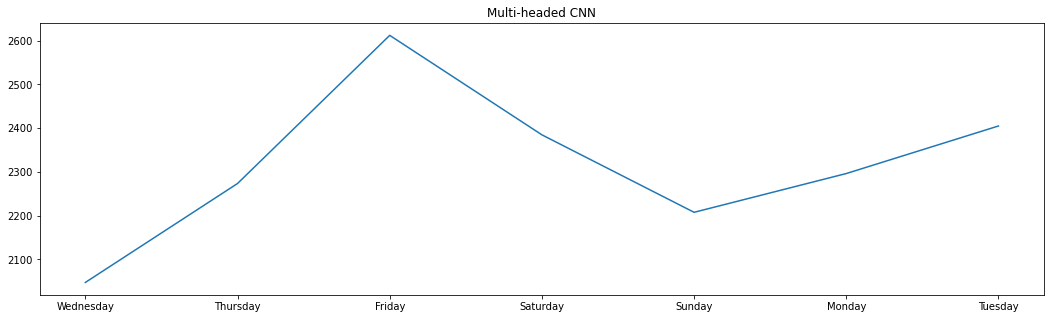

In [87]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_multHeadedCNN[3])
plt.title("Multi-headed CNN")

### Univariate Input and Vector Output

In [88]:
def evaluation_univInput(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [89]:
train_daily_univInput_X=[]
train_daily_univInput_y=[]
days=7
[[train_daily_univInput_X.append([[y] for y in train_daily.T[6][x:x+days]]),train_daily_univInput_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_univInput_X=np.array(train_daily_univInput_X)
train_daily_univInput_y=np.array(train_daily_univInput_y)
#train_daily_univInput_X

In [90]:
test_daily_univInput_X=[]
test_daily_univInput_y=[]
days=7
[[test_daily_univInput_X.append([[y] for y in test_daily.T[6][x:x+days]]),test_daily_univInput_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_univInput_X=np.array(test_daily_univInput_X)
test_daily_univInput_y=np.array(test_daily_univInput_y)
#test_daily_univInput_X

In [91]:
train_daily_univInput_X.shape

(2324, 7, 1)

In [92]:
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(days, 1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 7)                 231       
                                                                 
Total params: 1,227,463
Trainable params: 1,227,463
No

In [93]:
model.fit(train_daily_univInput_X,train_daily_univInput_y,validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 7s 70ms/step - loss: 30462410.0000 - val_loss: 26252396.0000
Epoch 2/20
66/66 [==============================] - 4s 65ms/step - loss: 16421975.0000 - val_loss: 25666028.0000
Epoch 3/20
66/66 [==============================] - 4s 66ms/step - loss: 15857677.0000 - val_loss: 24933710.0000
Epoch 4/20
66/66 [==============================] - 4s 66ms/step - loss: 16154399.0000 - val_loss: 27640616.0000
Epoch 5/20
66/66 [==============================] - 5s 72ms/step - loss: 15113871.0000 - val_loss: 22844190.0000
Epoch 6/20
66/66 [==============================] - 4s 66ms/step - loss: 14870009.0000 - val_loss: 22364930.0000
Epoch 7/20
66/66 [==============================] - 4s 67ms/step - loss: 14835551.0000 - val_loss: 22961488.0000
Epoch 8/20
66/66 [==============================] - 4s 67ms/step - loss: 14068932.0000 - val_loss: 22316570.0000
Epoch 9/20
66/66 [==============================] - 4s 67ms/step - loss: 14024263.0000 - val_los

In [94]:
train_daily_univInput_X[0,:,:]

array([[ 6881.64622347],
       [ 4721.36022955],
       [ 8530.59662902],
       [14129.05762394],
       [17116.6507251 ],
       [10709.73649737],
       [12392.91117699]])

In [95]:
k=np.array(list(train_daily_univInput_X.T[0].T)+list(test_daily_univInput_X.T[0].T))
k1=[[[y] for y in k[:i+1][0,:]] for i in range(len(k))]
predictions=[model.predict(np.array(k1[len(train_daily_univInput_X)-1+x:len(train_daily_univInput_X)+x])) for x in range(len(test_daily_univInput_X))]

In [96]:
test_daily_univInput_y

array([[2.87111409e+03, 3.27915774e+03, 1.96309797e+03, ...,
        1.17663131e+02, 9.64953243e+00, 0.00000000e+00],
       [3.27915774e+03, 1.96309797e+03, 6.71949166e+01, ...,
        9.64953243e+00, 0.00000000e+00, 0.00000000e+00],
       [1.96309797e+03, 6.71949166e+01, 1.17663131e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.02142907e+04, 2.77361367e+04, 2.54509900e+04, ...,
        2.91716298e+04, 2.43359250e+04, 1.87280744e+04],
       [2.77361367e+04, 2.54509900e+04, 2.30221411e+04, ...,
        2.43359250e+04, 1.87280744e+04, 2.27833011e+04],
       [2.54509900e+04, 2.30221411e+04, 2.91716298e+04, ...,
        1.87280744e+04, 2.27833011e+04, 2.08447668e+04]])

In [97]:
np.array(predictions)[:,0,:]

array([[12146.278, 11230.226, 11159.922, ..., 10807.557, 10461.852,
        10066.35 ],
       [12146.278, 11230.226, 11159.922, ..., 10807.557, 10461.852,
        10066.35 ],
       [12146.278, 11230.226, 11159.922, ..., 10807.557, 10461.852,
        10066.35 ],
       ...,
       [12146.278, 11230.226, 11159.922, ..., 10807.557, 10461.852,
        10066.35 ],
       [12146.278, 11230.226, 11159.922, ..., 10807.557, 10461.852,
        10066.35 ],
       [12146.278, 11230.226, 11159.922, ..., 10807.557, 10461.852,
        10066.35 ]], dtype=float32)

In [98]:
results_univInput=evaluation_univInput(test_daily_univInput_y,np.array(predictions)[:,0,:])
results_univInput

(78529176.02760506,
 [96216350.92897414,
  104097501.97147845,
  113413501.76873673,
  119654643.27079679,
  119693951.32539473,
  120091389.38553993,
  119105887.44053929],
 8861.668918866528,
 [9808.993369809878,
  10202.818334728814,
  10649.577539449005,
  10938.676486248087,
  10940.473085081592,
  10958.621691870741,
  10913.564378356838])

Text(0.5, 1.0, 'Univariate Input and Vector Output')

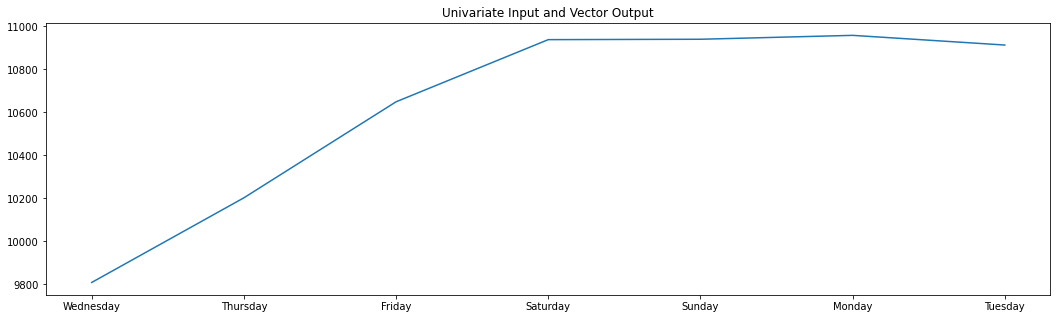

In [99]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_univInput[3])
plt.title("Univariate Input and Vector Output")

### Encoder-Decoder LSTM With Univariate Input

In [100]:
def evaluation_univInputEncDecLSTM(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [101]:
train_daily_univInputEncDecLSTM_X=[]
train_daily_univInputEncDecLSTM_y=[]
days=7
[[train_daily_univInputEncDecLSTM_X.append([[y] for y in train_daily.T[6][x:x+days]]),train_daily_univInputEncDecLSTM_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_univInputEncDecLSTM_X=np.array(train_daily_univInputEncDecLSTM_X)
train_daily_univInputEncDecLSTM_y=np.array(train_daily_univInputEncDecLSTM_y)
#train_daily_univInputEncDecLSTM_X

In [102]:
test_daily_univInputEncDecLSTM_X=[]
test_daily_univInputEncDecLSTM_y=[]
days=7
[[test_daily_univInputEncDecLSTM_X.append([[y] for y in test_daily.T[6][x:x+days]]),test_daily_univInputEncDecLSTM_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_univInputEncDecLSTM_X=np.array(test_daily_univInputEncDecLSTM_X)
test_daily_univInputEncDecLSTM_y=np.array(test_daily_univInputEncDecLSTM_y)
#test_daily_univInputEncDecLSTM_X

In [103]:
train_daily_univInputEncDecLSTM_Xtr=np.array([[x] for x in train_daily_univInputEncDecLSTM_X.flatten()])

In [104]:
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(days, 1)))
model.add(RepeatVector(7))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(LSTM(125, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(125, activation='relu')))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1052672   
                                                                 
 repeat_vector (RepeatVector  (None, 7, 512)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 7, 256)            787456    
                                                                 
 lstm_3 (LSTM)               (None, 7, 125)            191000    
                                                                 
 time_distributed (TimeDistr  (None, 7, 125)           15750     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 7, 64)           

In [105]:
train_daily_univInputEncDecLSTM_ytr=np.array([[[y] for y in x] for x in train_daily_univInputEncDecLSTM_y])

In [106]:
test_daily_univInputEncDecLSTM_ytr=np.array([[[y] for y in x] for x in test_daily_univInputEncDecLSTM_y])

In [107]:
model.fit(train_daily_univInputEncDecLSTM_X, train_daily_univInputEncDecLSTM_ytr,validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 15s 141ms/step - loss: 41516716.0000 - val_loss: 42257424.0000
Epoch 2/20
66/66 [==============================] - 7s 112ms/step - loss: 23227332.0000 - val_loss: 40574624.0000
Epoch 3/20
66/66 [==============================] - 8s 122ms/step - loss: 28388938.0000 - val_loss: 27708868.0000
Epoch 4/20
66/66 [==============================] - 8s 123ms/step - loss: 16609170.0000 - val_loss: 25895182.0000
Epoch 5/20
66/66 [==============================] - 7s 113ms/step - loss: 16100198.0000 - val_loss: 24804812.0000
Epoch 6/20
66/66 [==============================] - 8s 117ms/step - loss: 17338462.0000 - val_loss: 30653668.0000
Epoch 7/20
66/66 [==============================] - 8s 117ms/step - loss: 15726988.0000 - val_loss: 23341488.0000
Epoch 8/20
66/66 [==============================] - 8s 116ms/step - loss: 15111434.0000 - val_loss: 23590376.0000
Epoch 9/20
66/66 [==============================] - 8s 117ms/step - loss: 14967713.0000

In [108]:
k=np.array(list(train_daily_univInputEncDecLSTM_X.T[0].T)+list(test_daily_univInputEncDecLSTM_X.T[0].T))
k1=[[[y] for y in k[:i+1][0,:]] for i in range(len(k))]
predictions_univInputEncDecLSTM=[model.predict(np.array(k1[len(train_daily_univInputEncDecLSTM_X)-1+x:len(train_daily_univInputEncDecLSTM_X)+x])) for x in range(len(test_daily_univInputEncDecLSTM_X))]

In [109]:
results_univInputEncDecLSTM=evaluation_univInputEncDecLSTM(test_daily_univInputEncDecLSTM_y,np.array(predictions_univInputEncDecLSTM)[:,0,:,0])
results_univInputEncDecLSTM

(49859133.6666312,
 [22313222.041625436,
  26345308.428848725,
  29256262.832391977,
  30864722.41449163,
  30895125.228206582,
  31032049.628672846,
  30429305.909980785],
 7061.100032334282,
 [4723.687335294901,
  5132.768105890692,
  5408.90588126582,
  5555.602794881184,
  5558.338351360646,
  5570.641760934986,
  5516.276453367868])

Text(0.5, 1.0, 'Encoder-Decoder LSTM With Univariate Input')

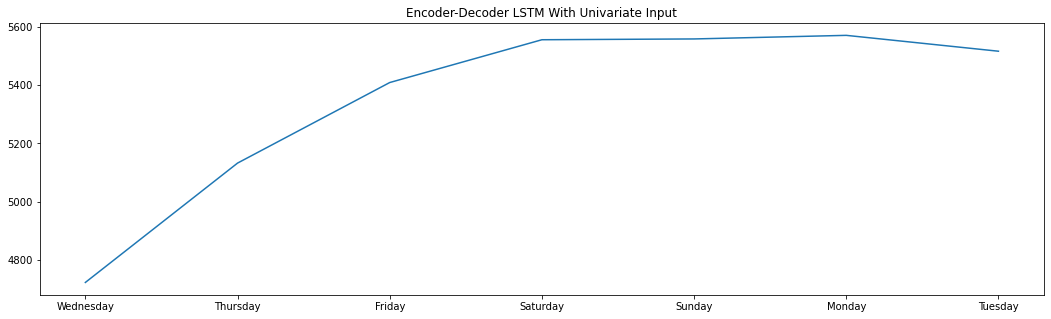

In [110]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_univInputEncDecLSTM[3])
plt.title("Encoder-Decoder LSTM With Univariate Input")

### Encoder-Decoder LSTM With Multivariate Input

In [111]:
def evaluation_multEncDecLSTM(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [112]:
train_daily_multEncDecLSTM_X=[]
train_daily_multEncDecLSTM_y=[]
days=7
[[train_daily_multEncDecLSTM_X.append([y for y in train_daily[x:x+days]]),train_daily_multEncDecLSTM_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_multEncDecLSTM_X=np.array(train_daily_multEncDecLSTM_X)
train_daily_multEncDecLSTM_y=np.array(train_daily_multEncDecLSTM_y)
#train_daily_multEncDecLSTM_X

In [113]:
test_daily_multEncDecLSTM_X=[]
test_daily_multEncDecLSTM_y=[]
days=7
[[test_daily_multEncDecLSTM_X.append([y for y in test_daily[x:x+days]]),test_daily_multEncDecLSTM_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_multEncDecLSTM_X=np.array(test_daily_multEncDecLSTM_X)
test_daily_multEncDecLSTM_y=np.array(test_daily_multEncDecLSTM_y)
#test_daily_multEncDecLSTM_X

In [114]:
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(days, multi_length)))
model.add(RepeatVector(7))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(LSTM(125, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(125, activation='relu')))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 512)               1079296   
                                                                 
 repeat_vector_1 (RepeatVect  (None, 7, 512)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 7, 256)            787456    
                                                                 
 lstm_6 (LSTM)               (None, 7, 125)            191000    
                                                                 
 time_distributed_3 (TimeDis  (None, 7, 125)           15750     
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 7, 64)           

In [115]:
test_daily_multEncDecLSTM_ytr=np.array([[[y] for y in x] for x in test_daily_multEncDecLSTM_y])

In [116]:
train_daily_multEncDecLSTM_ytr=np.array([[[y] for y in x] for x in train_daily_multEncDecLSTM_y])

In [117]:
model.fit(train_daily_multEncDecLSTM_X, train_daily_univInputEncDecLSTM_ytr,validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 15s 129ms/step - loss: 47586948.0000 - val_loss: 58031916.0000
Epoch 2/20
66/66 [==============================] - 7s 109ms/step - loss: 28749280.0000 - val_loss: 41341720.0000
Epoch 3/20
66/66 [==============================] - 7s 109ms/step - loss: 27061400.0000 - val_loss: 34842540.0000
Epoch 4/20
66/66 [==============================] - 7s 109ms/step - loss: 23035226.0000 - val_loss: 38043528.0000
Epoch 5/20
66/66 [==============================] - 7s 110ms/step - loss: 17426208.0000 - val_loss: 36660856.0000
Epoch 6/20
66/66 [==============================] - 7s 108ms/step - loss: 26337880.0000 - val_loss: 53924804.0000
Epoch 7/20
66/66 [==============================] - 7s 109ms/step - loss: 21685156.0000 - val_loss: 44496980.0000
Epoch 8/20
66/66 [==============================] - 7s 110ms/step - loss: 27191938.0000 - val_loss: 49149196.0000
Epoch 9/20
66/66 [==============================] - 7s 111ms/step - loss: 20045352.0000

In [118]:
k=np.array(list(train_daily_multEncDecLSTM_X)+list(test_daily_multEncDecLSTM_X))
predictions_multEncDecLSTM=[model.predict(k[len(train_daily_multEncDecLSTM_X)-1+x:len(train_daily_multEncDecLSTM_X)+x])[0] for x in range(len(test_daily_multEncDecLSTM_X))]

In [119]:
np.array(predictions_multEncDecLSTM)[:,:,0]

array([[ 2869.8433,  2529.311 ,  3159.6873, ...,  3446.1287,  3609.537 ,
         3786.0017],
       [ 2471.2078,  2261.8408,  2823.9644, ...,  2984.128 ,  3062.5642,
         3201.839 ],
       [ 2062.4148,  1957.5223,  2366.5894, ...,  2489.7112,  2586.9414,
         2691.281 ],
       ...,
       [21333.834 , 21675.021 , 22263.703 , ..., 20467.799 , 20303.15  ,
        20233.422 ],
       [21652.307 , 22295.023 , 22898.594 , ..., 20729.188 , 20340.799 ,
        20229.979 ],
       [22007.186 , 22676.7   , 23323.443 , ..., 21075.793 , 20658.066 ,
        20554.191 ]], dtype=float32)

In [120]:
results_multEncDecLSTM=evaluation_multEncDecLSTM(test_daily_multEncDecLSTM_y,np.array(predictions_multEncDecLSTM)[:,:,0])
results_multEncDecLSTM

(13487744.372509688,
 [7230115.4372630315,
  6326193.119904063,
  4919694.056246373,
  5103418.782549077,
  3570236.226515249,
  2921315.9212508304,
  10932724.131897807],
 3672.56645583299,
 [2688.8873976540985,
  2515.1924618016933,
  2218.038335161584,
  2259.0747624966016,
  1889.506873899973,
  1709.1857480247227,
  3306.467016605157])

Text(0.5, 1.0, 'Encoder-Decoder LSTM With Multivariate Input')

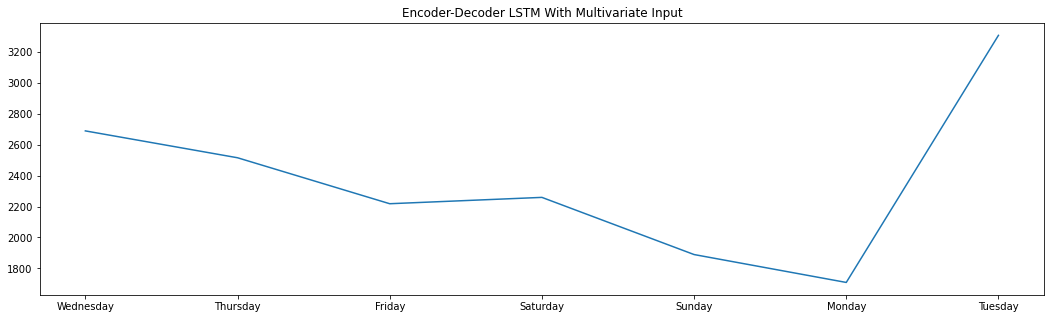

In [121]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_multEncDecLSTM[3])
plt.title("Encoder-Decoder LSTM With Multivariate Input")

### CNN-LSTM Encoder-Decoder With Univariate Input

In [122]:
def evaluation_univInputEncDecLSTMCNN(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [123]:
train_daily_univInputEncDecLSTMCNN_X=[]
train_daily_univInputEncDecLSTMCNN_y=[]
days=7
[[train_daily_univInputEncDecLSTMCNN_X.append([[y] for y in train_daily.T[6][x:x+days]]),train_daily_univInputEncDecLSTMCNN_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_univInputEncDecLSTMCNN_X=np.array(train_daily_univInputEncDecLSTMCNN_X)
train_daily_univInputEncDecLSTMCNN_y=np.array(train_daily_univInputEncDecLSTMCNN_y)
#train_daily_univInputEncDecLSTMCNN_X

In [124]:
test_daily_univInputEncDecLSTMCNN_X=[]
test_daily_univInputEncDecLSTMCNN_y=[]
days=7
[[test_daily_univInputEncDecLSTMCNN_X.append([[y] for y in test_daily.T[6][x:x+days]]),test_daily_univInputEncDecLSTMCNN_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_univInputEncDecLSTMCNN_X=np.array(test_daily_univInputEncDecLSTMCNN_X)
test_daily_univInputEncDecLSTMCNN_y=np.array(test_daily_univInputEncDecLSTMCNN_y)
#test_daily_univInputEncDecLSTMCNN_X

In [125]:
train_daily_univInputEncDecLSTMCNN_ytr=np.array([[[y] for y in x] for x in train_daily_univInputEncDecLSTMCNN_y])

In [126]:
test_daily_univInputEncDecLSTMCNN_ytr=np.array([[[y] for y in x] for x in test_daily_univInputEncDecLSTMCNN_y])

In [127]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(days,1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(7))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(128, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 5, 256)            1024      
                                                                 
 conv1d_32 (Conv1D)          (None, 3, 128)            98432     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 1, 128)           0         
 g1D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 128)               0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 7, 256)           

In [128]:
model.fit(train_daily_univInputEncDecLSTMCNN_X, train_daily_univInputEncDecLSTMCNN_ytr,validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 5s 30ms/step - loss: 28221768.0000 - val_loss: 29570686.0000
Epoch 2/20
66/66 [==============================] - 2s 24ms/step - loss: 20682764.0000 - val_loss: 26947540.0000
Epoch 3/20
66/66 [==============================] - 2s 24ms/step - loss: 16969826.0000 - val_loss: 25322200.0000
Epoch 4/20
66/66 [==============================] - 2s 24ms/step - loss: 16056744.0000 - val_loss: 28245534.0000
Epoch 5/20
66/66 [==============================] - 2s 24ms/step - loss: 15676452.0000 - val_loss: 24097274.0000
Epoch 6/20
66/66 [==============================] - 2s 24ms/step - loss: 15159559.0000 - val_loss: 23618524.0000
Epoch 7/20
66/66 [==============================] - 2s 24ms/step - loss: 14452448.0000 - val_loss: 21584488.0000
Epoch 8/20
66/66 [==============================] - 2s 24ms/step - loss: 13795799.0000 - val_loss: 20824404.0000
Epoch 9/20
66/66 [==============================] - 2s 23ms/step - loss: 13715259.0000 - val_los

In [129]:
k=np.array(list(train_daily_univInputEncDecLSTMCNN_X.T[0].T)+list(test_daily_univInputEncDecLSTMCNN_X.T[0].T))
k1=[[[y] for y in k[:i+1][0,:]] for i in range(len(k))]
predictions_univInputEncDecLSTMCNN=[model.predict(np.array(k1[len(train_daily_univInputEncDecLSTMCNN_X)-1+x:len(train_daily_univInputEncDecLSTMCNN_X)+x])) for x in range(len(test_daily_univInputEncDecLSTMCNN_X))]

In [130]:
np.array(predictions_univInputEncDecLSTMCNN)[:,0,:,0]

array([[12067.822, 10689.239,  9988.462, ...,  9185.418,  9244.809,
         9452.328],
       [12067.822, 10689.239,  9988.462, ...,  9185.418,  9244.809,
         9452.328],
       [12067.822, 10689.239,  9988.462, ...,  9185.418,  9244.809,
         9452.328],
       ...,
       [12067.822, 10689.239,  9988.462, ...,  9185.418,  9244.809,
         9452.328],
       [12067.822, 10689.239,  9988.462, ...,  9185.418,  9244.809,
         9452.328],
       [12067.822, 10689.239,  9988.462, ...,  9185.418,  9244.809,
         9452.328]], dtype=float32)

In [131]:
results_univInputEncDecLSTMCNN=evaluation_univInputEncDecLSTMCNN(test_daily_univInputEncDecLSTMCNN_y,np.array(predictions_univInputEncDecLSTMCNN)[:,0,:,0])
results_univInputEncDecLSTMCNN

(69820816.28706999,
 [78148349.84528634,
  85167823.46223846,
  94129658.83454336,
  100296015.82570386,
  100326454.66150475,
  100729726.79186065,
  99813491.74146274],
 8355.885128881919,
 [8840.155532867413,
  9228.641474357884,
  9702.044054452823,
  10014.789854295688,
  10016.309433194681,
  10036.42001870491,
  9990.670234847246])

Text(0.5, 1.0, 'CNN-LSTM Encoder-Decoder With Univariate Input')

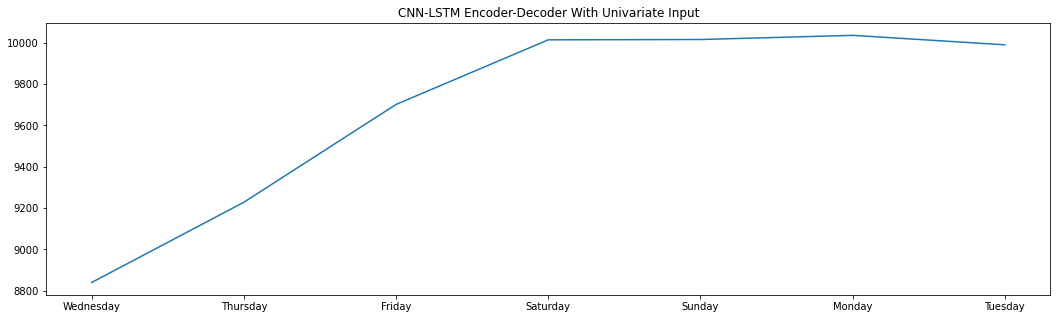

In [132]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_univInputEncDecLSTMCNN[3])
plt.title("CNN-LSTM Encoder-Decoder With Univariate Input")

### ConvLSTM Encoder-Decoder With Univariate Input

In [133]:
def evaluation_univInputEncDecConvLSTM(test,pred):
    totalMSE=mean_squared_error(np.array(test).flatten(),np.array(pred).flatten())
    totalRMSE=sqrt(totalMSE)
    rowMSE=[]
    rowRMSE=[]
    for i in range(7):
        rowMSE.append(mean_squared_error(np.array(test[i]),np.array(pred)[i]))
        rowRMSE.append(sqrt(rowMSE[i]))
    return totalMSE,rowMSE,totalRMSE,rowRMSE

In [134]:
train_daily_univInputEncDecConvLSTM_X=[]
train_daily_univInputEncDecConvLSTM_y=[]
days=2*7
[[train_daily_univInputEncDecConvLSTM_X.append([[y] for y in train_daily.T[6][x:x+days]]),train_daily_univInputEncDecConvLSTM_y.append(train_daily.T[6][x+days:x+days+7])] 
         for x in range(len(train_daily)-days-7)]
train_daily_univInputEncDecConvLSTM_X=np.array(train_daily_univInputEncDecConvLSTM_X)
train_daily_univInputEncDecConvLSTM_y=np.array(train_daily_univInputEncDecConvLSTM_y)
#train_daily_univInputEncDecConvLSTM_X

In [135]:
test_daily_univInputEncDecConvLSTM_X=[]
test_daily_univInputEncDecConvLSTM_y=[]
days=2*7
[[test_daily_univInputEncDecConvLSTM_X.append([[y] for y in test_daily.T[6][x:x+days]]),test_daily_univInputEncDecConvLSTM_y.append(test_daily.T[6][x+days:x+days+7])] 
         for x in range(len(test_daily)-days-7)]
test_daily_univInputEncDecConvLSTM_X=np.array(test_daily_univInputEncDecConvLSTM_X)
test_daily_univInputEncDecConvLSTM_y=np.array(test_daily_univInputEncDecConvLSTM_y)
#test_daily_univInputEncDecConvLSTM_X

In [136]:
np.array(test_daily_univInputEncDecConvLSTM_y).shape

(560, 7)

In [137]:
model = Sequential()
model.add(ConvLSTM2D(filters=128, kernel_size=(1,3), activation='relu',input_shape=(2, 1, 7, 1)))
model.add(Flatten())
model.add(RepeatVector(7))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(128, activation='relu')))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dense(1)))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 5, 128)         198656    
                                                                 
 flatten_17 (Flatten)        (None, 640)               0         
                                                                 
 repeat_vector_3 (RepeatVect  (None, 7, 640)           0         
 or)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 7, 256)            918528    
                                                                 
 time_distributed_8 (TimeDis  (None, 7, 128)           32896     
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 7, 64)           

In [138]:
train_daily_univInputEncDecConvLSTM_ytr=np.array([[[y] for y in x] for x in train_daily_univInputEncDecConvLSTM_y])

In [139]:
test_daily_univInputEncDecConvLSTM_ytr=np.array([[[y] for y in x] for x in test_daily_univInputEncDecConvLSTM_y])

In [140]:
train_daily_univInputEncDecConvLSTM_X.shape

(2317, 14, 1)

In [141]:
train_daily_univInputEncDecConvLSTM_Xtr=train_daily_univInputEncDecConvLSTM_X.reshape((train_daily_univInputEncDecConvLSTM_X.shape[0], 2, 1, 7, 1))

In [142]:
test_daily_univInputEncDecConvLSTM_Xtr=test_daily_univInputEncDecConvLSTM_X.reshape((test_daily_univInputEncDecConvLSTM_X.shape[0], 2, 1, 7, 1))

In [143]:
#train_daily_univInputEncDecConvLSTM_Xtr

In [149]:
model.fit(train_daily_univInputEncDecConvLSTM_Xtr, train_daily_univInputEncDecLSTMCNN_ytr,validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 3s 50ms/step - loss: 6110083.0000 - val_loss: 7752712.5000
Epoch 2/20
66/66 [==============================] - 3s 50ms/step - loss: 4047293.2500 - val_loss: 5687396.5000
Epoch 3/20
66/66 [==============================] - 3s 52ms/step - loss: 3805939.0000 - val_loss: 5671562.0000
Epoch 4/20
66/66 [==============================] - 3s 53ms/step - loss: 2955505.5000 - val_loss: 4474424.5000
Epoch 5/20
66/66 [==============================] - 4s 53ms/step - loss: 3232519.7500 - val_loss: 4891031.0000
Epoch 6/20
66/66 [==============================] - 4s 53ms/step - loss: 2480201.7500 - val_loss: 3711401.7500
Epoch 7/20
66/66 [==============================] - 4s 54ms/step - loss: 2253227.2500 - val_loss: 3270980.2500
Epoch 8/20
66/66 [==============================] - 4s 58ms/step - loss: 1949771.3750 - val_loss: 2942250.2500
Epoch 9/20
66/66 [==============================] - 4s 55ms/step - loss: 1745924.3750 - val_loss: 2603699.2500
E

In [150]:
k=np.array(list(train_daily_univInputEncDecConvLSTM_X)+list(test_daily_univInputEncDecConvLSTM_X))
k1=k.reshape((k.shape[0], 2, 1, 7, 1))
predictions_univInputEncDecConvLSTM=[model.predict(k1[len(train_daily_univInputEncDecConvLSTM_X)-1+x:len(train_daily_univInputEncDecConvLSTM_X)+x])[0] for x in range(len(test_daily_univInputEncDecConvLSTM_X))]


In [151]:
test_daily_univInputEncDecConvLSTM_ytr[:,:,0]

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,   358.74041579,  1115.04991074],
       [    0.        ,     0.        ,    56.57150289, ...,
          358.74041579,  1115.04991074,   718.41291573],
       [    0.        ,    56.57150289,     0.        , ...,
         1115.04991074,   718.41291573,   150.62312119],
       ...,
       [20214.29069712, 27736.13669677, 25450.99002325, ...,
        29171.62983311, 24335.92496762, 18728.07437953],
       [27736.13669677, 25450.99002325, 23022.1411349 , ...,
        24335.92496762, 18728.07437953, 22783.30114282],
       [25450.99002325, 23022.1411349 , 29171.62983311, ...,
        18728.07437953, 22783.30114282, 20844.76677004]])

In [152]:
np.array(predictions_univInputEncDecConvLSTM)[:,:,0]

array([[ 5.46452881e+03,  3.70669360e+03,  9.04438904e+02, ...,
        -2.21479855e+01, -4.23461342e+01,  9.81472301e+00],
       [ 3.03745728e+03,  3.07471118e+03,  2.11218579e+03, ...,
         6.74110947e+01,  8.98990917e+00,  2.52210789e+01],
       [ 3.03955127e+03,  1.89002600e+03,  2.21164551e+02, ...,
         9.99955273e+00, -2.47370815e+01,  2.34434452e+01],
       ...,
       [ 2.14260254e+04,  1.72260059e+04,  1.85685098e+04, ...,
         2.11621387e+04,  2.47508613e+04,  2.16620957e+04],
       [ 1.79905918e+04,  1.91525352e+04,  1.05392295e+04, ...,
         2.47193848e+04,  1.97984961e+04,  2.43179355e+04],
       [ 1.88947910e+04,  1.16663887e+04,  2.17229609e+04, ...,
         2.17848984e+04,  2.13670098e+04,  2.06403008e+04]], dtype=float32)

In [153]:
results_univInputEncDecConvLSTM=evaluation_univInputEncDecConvLSTM(test_daily_univInputEncDecConvLSTM_ytr[:,:,0],np.array(predictions_univInputEncDecConvLSTM)[:,:,0])
results_univInputEncDecConvLSTM

(21291849.411811642,
 [6543825.469468074,
  3553467.1639595334,
  2073075.4146812328,
  844891.0293778835,
  279668.1510727827,
  272018.9012921362,
  270861.2705357654],
 4614.3092020162285,
 [2558.0901996348907,
  1885.0642333776145,
  1439.8178407983535,
  919.1795414269639,
  528.8366014874374,
  521.5543128880598,
  520.4433403702707])

Text(0.5, 1.0, 'ConvLSTM Encoder-Decoder With Univariate Input')

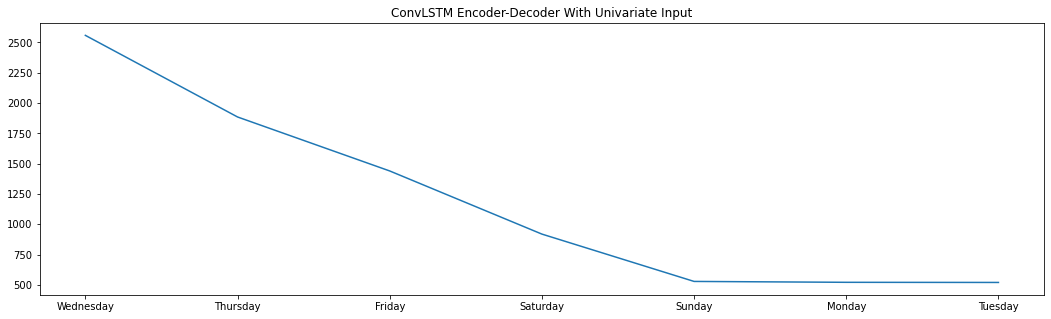

In [154]:
fig = plt.figure(figsize=(18,5))
plt.plot(test_days_names,results_univInputEncDecConvLSTM[3])
plt.title("ConvLSTM Encoder-Decoder With Univariate Input")